In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/Users/lanahaj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
pip install --upgrade numpy scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 17.2 MB/s eta 0:00:00 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
Note: you may need to restart the kernel to use updated packages.


In [22]:
dataset = pd.read_csv('iris.data.csv')


In [5]:
X = dataset.drop(columns=['Iris-setosa'])  # Replace 'species' with the actual label column name
y = dataset['Iris-setosa']  # Assuming 'species' is the column with labels


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [8]:
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['label'] = y


<AxesSubplot:title={'center':'PCA Visualization of Iris Dataset'}, xlabel='PCA Component 1', ylabel='PCA Component 2'>

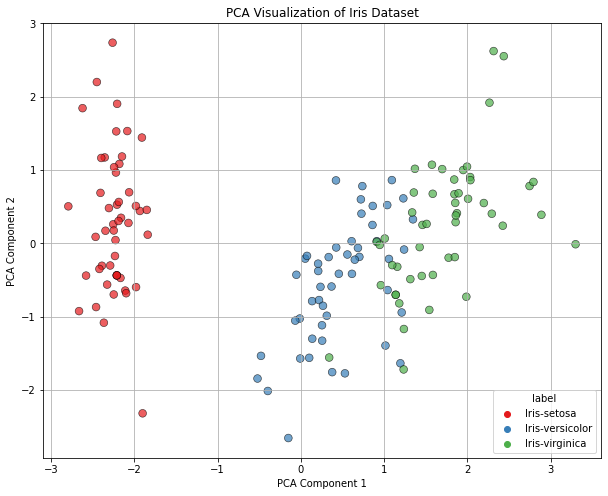

In [16]:
plt.figure(figsize=(10, 8))
plt.title('PCA Visualization of Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)

sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='label', palette='Set1', s=60, alpha=0.7, edgecolor='k')



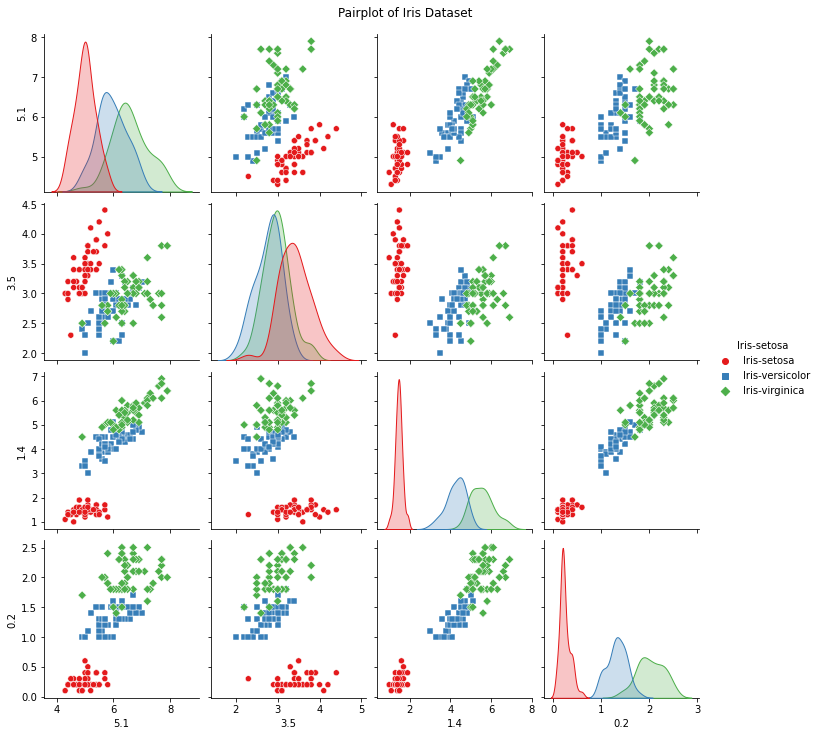

In [18]:
sns.pairplot(dataset, hue='Iris-setosa', palette='Set1', markers=["o", "s", "D"])

plt.suptitle('Pairplot of Iris Dataset', y=1.02)

plt.show()

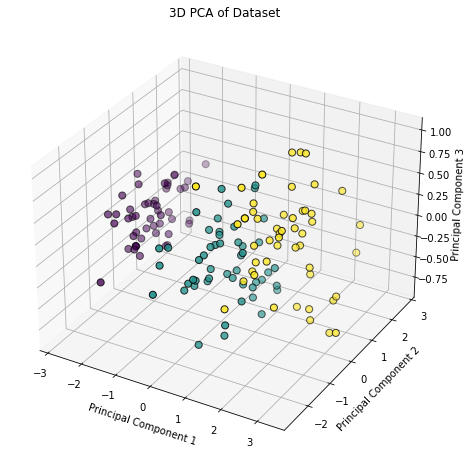

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Apply PCA to 3 components for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_encoded, cmap='viridis', edgecolor='k', s=50)

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Dataset')

plt.show()

In [46]:
dataset2 = pd.read_csv("WineQT.csv") 

In [47]:
print(dataset2.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [48]:
features = dataset2.drop(columns=['quality', 'Id']) 
labels = dataset2['quality']

In [54]:
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

Features shape: (1143, 11)
Labels shape: (1143,)


In [49]:

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [55]:
print("Scaled features shape:", scaled_features.shape)


Scaled features shape: (1143, 11)


In [50]:
pca = PCA(n_components=3)  # For a 3D plot
features_pca = pca.fit_transform(scaled_features)

In [56]:
print("PCA transformed features shape:", features_pca.shape)


PCA transformed features shape: (1143, 3)


In [57]:
print("First few PCA-transformed data points:", features_pca[:5])


First few PCA-transformed data points: [[-1.56154478  0.44489171 -1.76720916]
 [-0.76089236  1.91505819 -0.8641578 ]
 [-0.70808539  0.91442316 -1.14236292]
 [ 2.30816576 -0.22444797  0.25689511]
 [-1.56154478  0.44489171 -1.76720916]]


In [51]:
fig = plt.figure(figsize=(10, 7))

<Figure size 720x504 with 0 Axes>

In [52]:
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], 
                     c=labels, cmap='viridis', edgecolor='k', s=50)



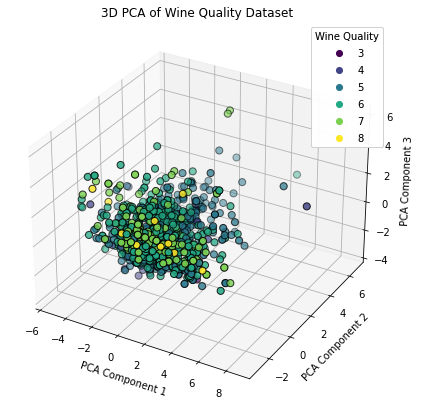

In [58]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], 
                     c=labels, cmap='viridis', edgecolor='k', s=50)

# Labels and title
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('3D PCA of Wine Quality Dataset')

# Add legend for quality labels
legend = ax.legend(*scatter.legend_elements(), title="Wine Quality")
ax.add_artist(legend)

plt.show()

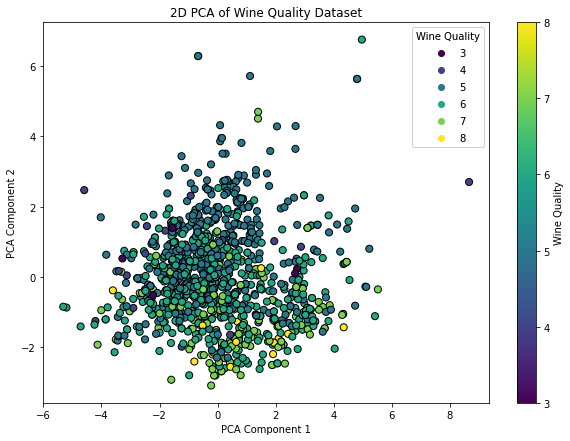

In [59]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(scaled_features)

# Plotting the 2D PCA
plt.figure(figsize=(10, 7))
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], 
                      c=labels, cmap='viridis', edgecolor='k', s=50)

# Labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA of Wine Quality Dataset')

# Add legend for quality labels
legend = plt.legend(*scatter.legend_elements(), title="Wine Quality")
plt.gca().add_artist(legend)

plt.colorbar(scatter, label='Wine Quality')
plt.show()